# Set up

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 189s 1us/step


# Dataset review

In [5]:
# Images already reshaped as 32x32.
# 3 Color channels.
# y is not one-hot-encoded yet.
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("\n")
print("Testing data X shape: {}".format(X_test.shape))
print("Testing data y shape: {}".format(y_test.shape))

Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)


Testing data X shape: (10000, 32, 32, 3)
Testing data y shape: (10000, 1)


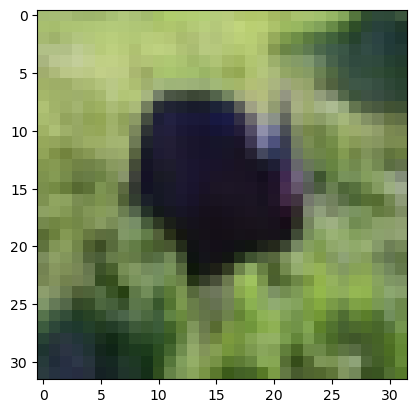

In [6]:
i_image= 218                                                        # Image index. You can change it at will.
a_single_image= X_train[i_image,:,:,:]
plt.imshow(a_single_image)                                          #  Display as a color image.
plt.show()

In [7]:
# Check for the minimum and maximum pixel value.
print("MIN : {}".format(a_single_image.min()))                 
print("MAX : {}".format(a_single_image.max())) 

MIN : 10
MAX : 213


## Data Preprocessing

In [8]:
# Scaling.
X_train = X_train/255                      
X_test = X_test/255   

### Hyperparameter

In [19]:
batch_size = 24
n_epochs  = 20
learn_rate = 0.0001

## Define the deep learning model

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

# 1st Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters= 64, kernel_size=(7, 7),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation=None))
# 1st Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

In [30]:
# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters= 128, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))                      # Apply the ReLu activation function. 
# 2nd Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))

In [31]:
# 3rd Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_3', activation='relu'))                      # Apply the ReLu activation function. 
# 3rd Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_3'))

In [32]:
# Flattened full layer
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

In [33]:
# Dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

In [34]:
# Output layer
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

## Define the loss function and the optimizer

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training

In [37]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/20
2084/2084 [==============================] - 34s 16ms/step - loss: 0.7810 - accuracy: 0.7293 - val_loss: 0.9044 - val_accuracy: 0.6923
Epoch 2/20
2084/2084 [==============================] - 33s 16ms/step - loss: 0.7386 - accuracy: 0.7459 - val_loss: 0.8908 - val_accuracy: 0.7003
Epoch 3/20
2084/2084 [==============================] - 33s 16ms/step - loss: 0.7074 - accuracy: 0.7591 - val_loss: 0.9355 - val_accuracy: 0.6966
Epoch 4/20
2084/2084 [==============================] - 32s 15ms/step - loss: 0.6890 - accuracy: 0.7671 - val_loss: 1.0307 - val_accuracy: 0.6831
Epoch 5/20
2084/2084 [==============================] - 32s 15ms/step - loss: 0.6837 - accuracy: 0.7719 - val_loss: 1.0282 - val_accuracy: 0.6966
Epoch 6/20
2084/2084 [==============================] - 33s 16ms/step - loss: 0.6902 - accuracy: 0.7758 - val_loss: 1.1119 - val_accuracy: 0.6930
Epoch 7/20
2084/2084 [==============================] - 33s 16ms/step - loss: 0.7166 - accuracy: 0.7766 - val_loss: 1.2431 -

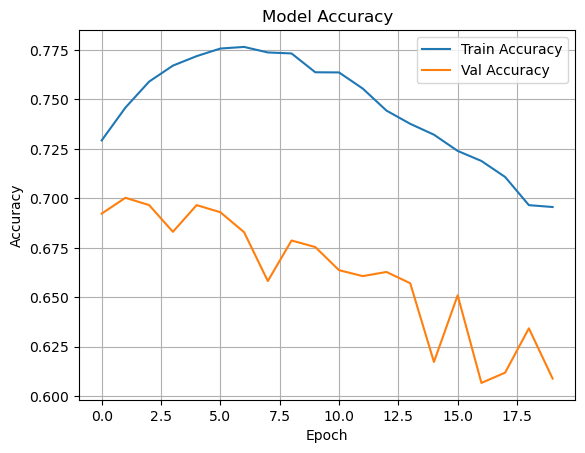

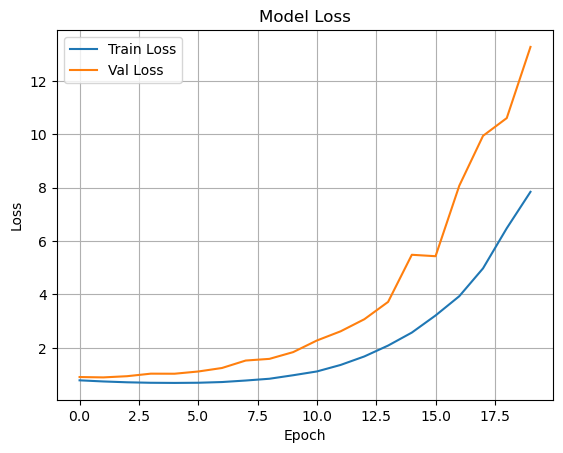

In [39]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
pred_probs = model.predict(X_test)                 # Predict probabilities
pred_labels = np.argmax(pred_probs, axis=1)        # Convert to predicted class indices

true_labels = y_test.flatten()       

313/313 [==============================] - 3s 8ms/step


<Figure size 1000x1000 with 0 Axes>

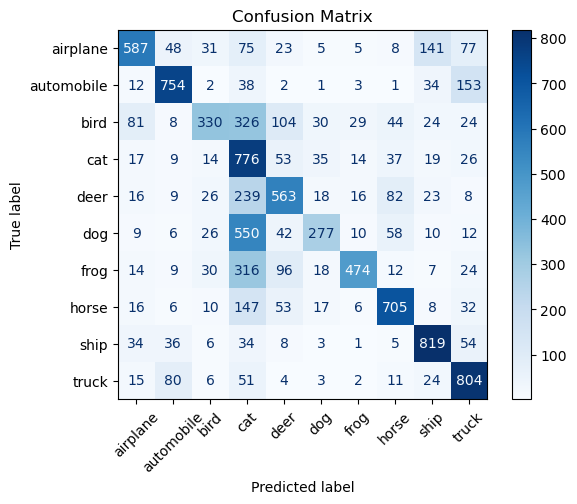

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
